In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc, roc_auc_score


C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")  

In [3]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


# Handle Missing Values

In [5]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=["object"]).columns
numeric_columns = df.select_dtypes(include=["number"]).columns

In [6]:
# Impute missing values in numeric columns with median
num_imputer = SimpleImputer(strategy="median")
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

# Impute missing values in categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [7]:
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,0,2,262.0,19.0,7.0,2,0,61,1.0,0.0,0.0,5.52,0.0
1,1.0,0,2,112.0,20.0,3.0,2,0,61,0.0,0.0,0.0,5.52,0.0
2,2.0,0,2,243.0,22.0,17.0,6,0,36,1.0,1.0,0.0,5.52,0.0
3,1.0,0,2,96.0,31.0,4.0,2,0,61,0.0,0.0,1.0,5.52,0.0
4,2.0,0,2,68.0,22.0,15.0,6,0,36,1.0,0.0,1.0,5.52,0.0


# Feature Engineering

In [10]:
df['total_stay_cost'] = df['num_passengers'] * df['flight_duration']  
df['booking_lead_time'] = df['purchase_lead'] / (df['length_of_stay'] + 1)  

# Select Features and Target

In [11]:
features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration', 'total_stay_cost', 'booking_lead_time']
target = 'booking_complete' 

# Train Test Split 

In [12]:
X = df[features]
y = df[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cv_score = np.mean(cross_val_score(rf, X, y, cv=5))

In [16]:
print("Model Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

Model Accuracy: 0.8171
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      8520
         1.0       0.26      0.12      0.17      1480

    accuracy                           0.82     10000
   macro avg       0.56      0.53      0.53     10000
weighted avg       0.77      0.82      0.79     10000



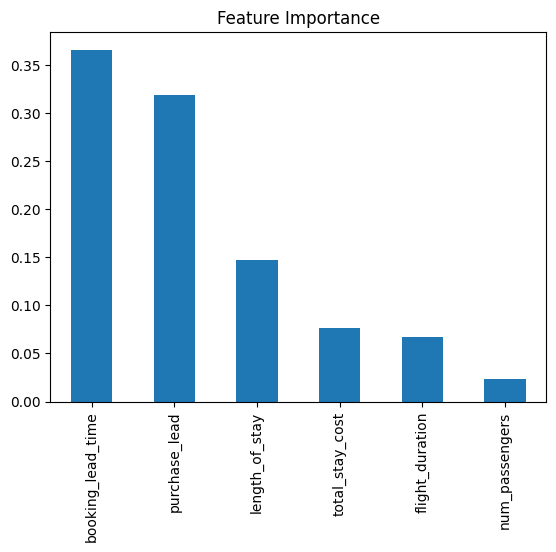

In [17]:
# Feature importance visualization
feature_importance = pd.Series(rf.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

In [18]:
# Cross-validation score
rf_cv_mean = np.mean(rf_cv_score)
print("Random Forest Cross-validation accuracy:", rf_cv_mean)

Random Forest Cross-validation accuracy: 0.6056999999999999


In [19]:
rf_probs = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
rf_roc_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest ROC-AUC Score:", rf_roc_auc)

Random Forest ROC-AUC Score: 0.5938447294125111


# XGBoost Model

In [20]:
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [21]:
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_cv_score = np.mean(cross_val_score(xgb, X, y, cv=5))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [22]:
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8506
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      8520
         1.0       0.35      0.01      0.02      1480

    accuracy                           0.85     10000
   macro avg       0.60      0.50      0.47     10000
weighted avg       0.78      0.85      0.79     10000



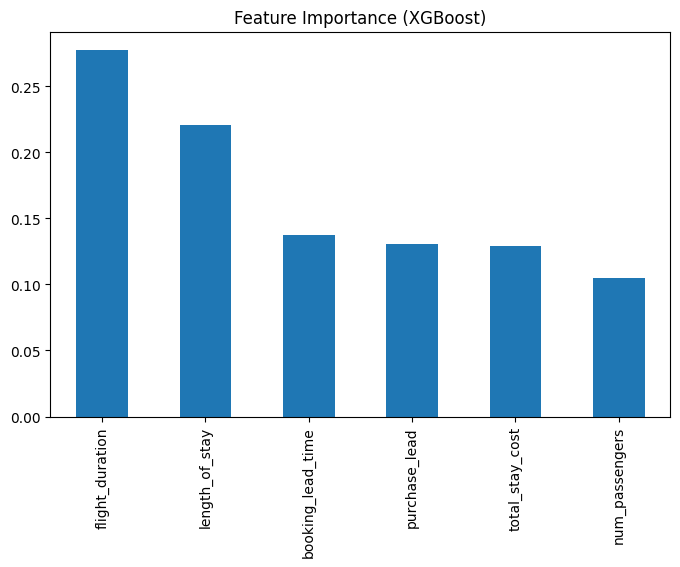

In [23]:
# Feature importance for XGBoost
plt.figure(figsize=(8,5))
pd.Series(xgb.feature_importances_, index=features).sort_values(ascending=False).plot(kind='bar', title='Feature Importance (XGBoost)')
plt.show()

In [25]:
xgb_cv_mean = np.mean(xgb_cv_score)
print("XGBoost Cross-validation accuracy:", xgb_cv_mean)

XGBoost Cross-validation accuracy: 0.6126799999999999


In [26]:
# Compute predictions and probabilities
xgb_probs = xgb.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)
print("XGBoost ROC-AUC Score:", xgb_roc_auc)

XGBoost ROC-AUC Score: 0.6505697643065602


# ROC-AUC Curve

In [27]:
# Compute ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Compute ROC curve and AUC for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

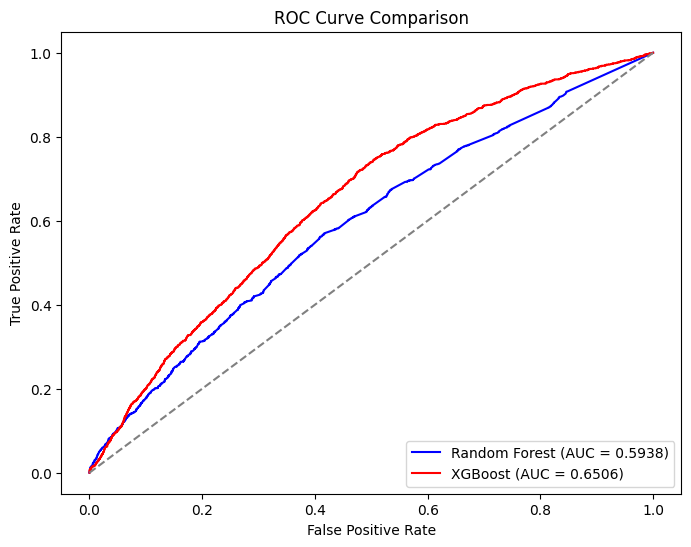

In [28]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.4f})', color='red')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Show plot
plt.show()

# Compare Models

In [29]:
print("\n📌 Random Forest Model Comparison Summary")
print(f"Accuracy: {acc_rf:.4f}")
print(f"F1 Score: {rf_f1:.4f}") 
print(f"Cross-validation Accuracy: {rf_cv_mean:.4f}")
print("     ")
print("\n📌 XGBoost Model Comparison Summary")
print(f"Accuracy: {xgb_accuracy:.4f}") 
print(f"F1 Score: {xgb_f1:.4f}")
print(f"Cross-validation Accuracy: {xgb_cv_mean:.4f}")


📌 Random Forest Model Comparison Summary
Accuracy: 0.8171
F1 Score: 0.1667
Cross-validation Accuracy: 0.6057
     

📌 XGBoost Model Comparison Summary
Accuracy: 0.8506
F1 Score: 0.0223
Cross-validation Accuracy: 0.6127


# Select the Best Model

In [30]:
best_model = "XGBoost" if xgb_accuracy > acc_rf else "Random Forest"
print(f"The best model based on accuracy is: {best_model}")

The best model based on accuracy is: XGBoost
